### Matthew Collins
#### DSC 630 Predictive Analytics
#### 9.3 Assignment:  Calculate Probability of Model Ensemble

Calculate the probability of a model ensemble that uses simple majority voting making an incorrect prediction in the following scenarios. (Hint: Understanding how to use the binomial distribution will be useful in answering this question.)
- The ensemble contains 11 independent models, all of which have an error rate of 0.2.
- The ensemble contains 11 independent models, all of which have an error rate of 0.49.
- The ensemble contains 21 independent models, all of which have an error rate of 0.49.

In [2]:
# import libraries used for analysis

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


#### Probability for 11 independent models, all with an error rate of 0.2

In [46]:
# set the variables for - the ensemble contains 11 independent models, all of which have an error rate of 0.2

n = 11   # number of independent models
p = 0.8  # single success rate (or 1 - 0.2)

In [47]:
# perform the calculations using variables n and p

mean, var, skew, kurt = binom.stats(n, p, moments = 'mvsk')

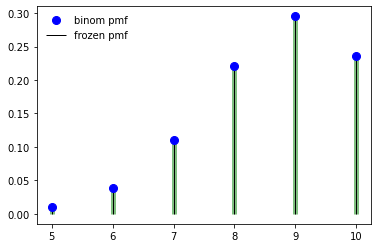

In [48]:
# create the probability mass function (pmf)

fig, ax = plt.subplots(1,1)

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms = 8, label = 'binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors = 'g', lw = 5, alpha = 0.5)

# freeze the distribution and display

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors = 'k', linestyles = '-', lw = 1, label = 'frozen pmf')
ax.legend(loc = 'best', frameon = False)
plt.show()

In [35]:
# check accuracy of cdf and ppf

prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

#### Probability for 11 independent models, all with an error rate of 0.49

In [27]:
# set the variables for - the ensemble contains 11 independent models, all of which have an error rate of 0.49

n = 11   # number of independent models
p = 0.51  # single success rate (or 1 - 0.49)

In [28]:
# perform the calculations using variables n and p

mean, var, skew, kurt = binom.stats(n, p, moments = 'mvsk')

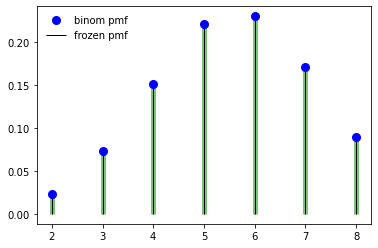

In [30]:
# create the probability mass function (pmf)

fig, ax = plt.subplots(1,1)

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms = 8, label = 'binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors = 'g', lw = 5, alpha = 0.5)

# freeze the distribution and display

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors = 'k', linestyles = '-', lw = 1, label = 'frozen pmf')
ax.legend(loc = 'best', frameon = False)
plt.show()

In [31]:
# check accuracy of cdf and ppf

prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

#### Probability for 21 independent models, all with an error rate of 0.49

In [23]:
# set the variables for - the ensemble contains 21 independent models, all of which have an error rate of 0.49

n = 21   # number of independent models
p = 0.51  # single success rate (or 1 - 0.49)

In [24]:
# perform the calculations using variables n and p

mean, var, skew, kurt = binom.stats(n, p, moments = 'mvsk')

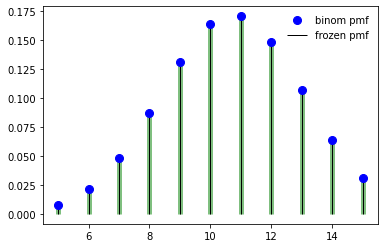

In [25]:
# create the probability mass function (pmf)

fig, ax = plt.subplots(1,1)

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms = 8, label = 'binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors = 'g', lw = 5, alpha = 0.5)

# freeze the distribution and display

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors = 'k', linestyles = '-', lw = 1, label = 'frozen pmf')
ax.legend(loc = 'best', frameon = False)
plt.show()

In [26]:
# check accuracy of cdf and ppf

prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

### Looking at alternative method for evaluating probability distributions visually (only done for bullet 1)
#### Probability for 11 independent models, all with an error rate of 0.2

In [14]:
# of n and p  (note in this scenario 9 = 1 - error rate)
n = 11
p = 0.8

# defining the list of r values
r_values = list(range(n+1))

# obtaining the mean and variance 
mean, var = binom.stats(n, p)

# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]

# printing the table
print("r\tp(r)")
for i in range(n + 1):
    print(str(r_values[i]) + "\t" + str(dist[i]))
    
# printing mean and variance
print("mean = "+str(mean))
print("variance = "+str(var))

r	p(r)
0	2.0479999999999952e-08
1	9.011199999999997e-07
2	1.8022400000000016e-05
3	0.00021626880000000012
4	0.0017301503999999984
5	0.009688842239999993
6	0.038755368960000015
7	0.11072962560000005
8	0.22145925120000012
9	0.29527900160000037
10	0.2362232012800001
11	0.08589934592000005
mean = 8.8
variance = 1.7599999999999998


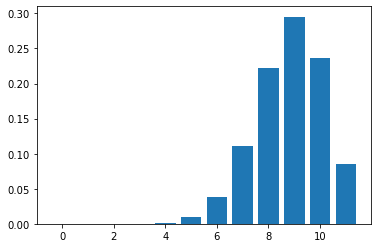

In [15]:
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show()

### Simple CDF Calculation to answer the questions
#### Setting the p-value, using 1 - error  and success is considered the culmative probability of getting the majority needed.
#### Majority is 1 more vote than the alternative (e.g., 11 models means 6 for majority).

In [8]:
# With 11 models and an error rate of 20% what is the probability 6 will provide an incorrect prediction?

binom.cdf(5, 11, 0.8)  # for this success is 5 and p rate = 1 - error rate


0.011654205439999985

In [4]:
# With 11 models and an error rate of 49% what is the probability 6 will provide an incorrect prediction?

binom.cdf(5, 11, 0.51)  # for this success is 5 and p rate = 1 - error rate

0.47294772571497473

In [6]:
# With 21 models and an error rate of 49% what is the probability 6 will provide an incorrect prediction?

binom.cdf(10, 21, 0.51) # for this success is 10 and p rate = 1 - error rate

0.4630479010127354

### Answers:
#### 11 models & error rate of 20% = 1.2%
#### 11 models & error rate of 49% = 47.3%
#### 21 models & error rate of 49% = 46.3% 